In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

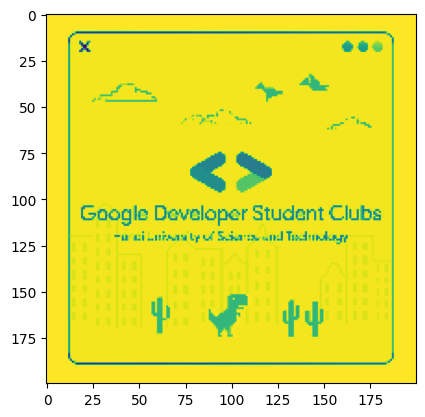

In [5]:
img = cv2.imread("GDSC.jpg")
img = cv2.resize(img, (200,200))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [6]:
class Conv2d:
    def __init__(self, input, numKernel = 16 , kernelSize = 3, padding = 0, stride = 1 ):
        self.input = np.pad(input, ((padding,padding), (padding, padding)), 'constant')
        self.stride = stride
        self.kernel = np.random.randn(numKernel, kernelSize, kernelSize)
        output_height = (self.input.shape[0] - kernelSize) // stride + 1
        output_width = (self.input.shape[1] - kernelSize) // stride + 1
        self.results = np.zeros((output_height, output_width, numKernel))
        
    def getROI(self):
        for row in range(int((self.input.shape[0] - self.kernel.shape[1]/self.stride)) + 1):
            for col in range(int((self.input.shape[1] - self.kernel.shape[2])/self.stride) + 1):
                roi = self.input[row*self.stride: row*self.stride + self.kernel.shape[1],
                                 col*self.stride: col*self.stride + self.kernel.shape[2]]
                yield row, col, roi
    def operate(self):
        for layer in range(self.kernel.shape[0]):
            for row, col, roi in self.getROI():
                self.results[row,col,layer] = np.sum(roi * self.kernel[layer,: ,: ])
        return self.results

In [7]:
class Relu:
    def __init__(self,input):
        self.input = input
        self.results = np.zeros((
            self.input.shape[0],
            self.input.shape[1],
            self.input.shape[2]
        ))
    def operate(self):
        for layer in range(self.input.shape[2]):
            for row in range(self.input.shape[0]):
                for col in range(self.input.shape[1]):
                    self.results[row,col,layer] = 0.1*self.input[row,col,layer] if self.input[row,col,layer] < 0 else self.input[row,col,layer]
        return self.results

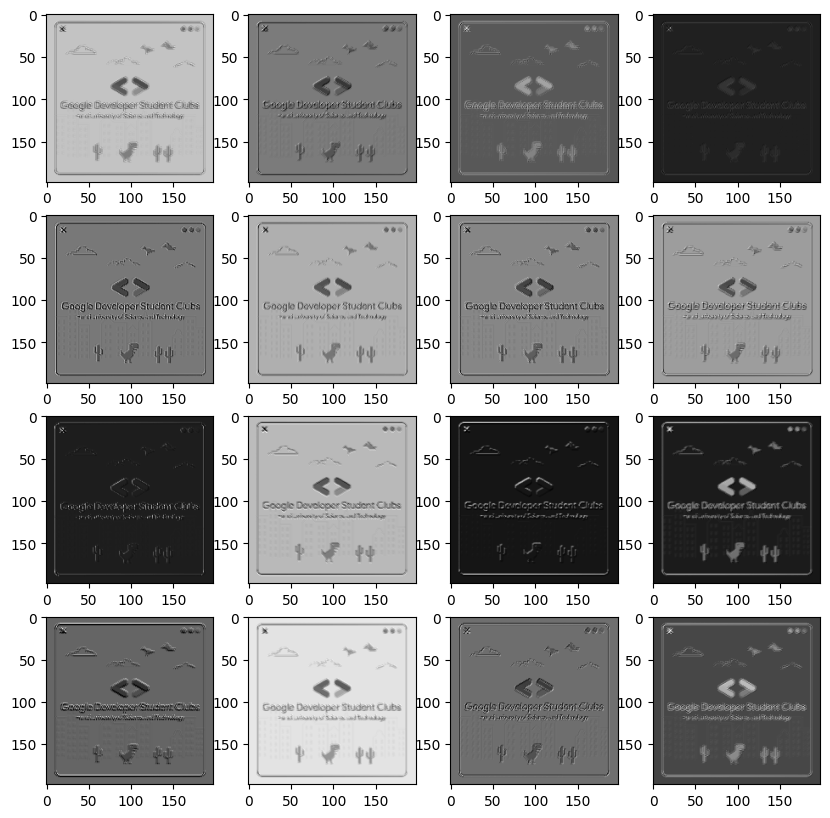

In [8]:
img_gray_conv2d = Conv2d(img, 16, 3, 0, 1).operate()
img_gray_relu = Relu(img_gray_conv2d).operate()
fig = plt.figure(figsize= (10,10))
for i in range (16):
    plt.subplot(4, 4, i+1)
    plt.imshow(img_gray_relu[:,:,i], cmap= 'gray')
plt.show()

In [9]:
class Maxpooling:
    def __init__(self, input, poolingsize=2):
        self.input = input
        self.poolingsize = poolingsize
        self.results = np.zeros((self.input.shape[0]//self.poolingsize,
                                 self.input.shape[1]//self.poolingsize,
                                 self.input.shape[2]))
    def operate(self):
        for layer in range(self.input.shape[2]):
            for row in range(self.input.shape[0]//self.poolingsize):
                for col in range(self.input.shape[1]//self.poolingsize):
                    self.results[row,col,layer] = np.max(self.input[row*self.poolingsize: row*self.poolingsize + self.poolingsize, 
                                                                    col*self.poolingsize: col*self.poolingsize + self.poolingsize, 
                                                                    layer])
        return self.results

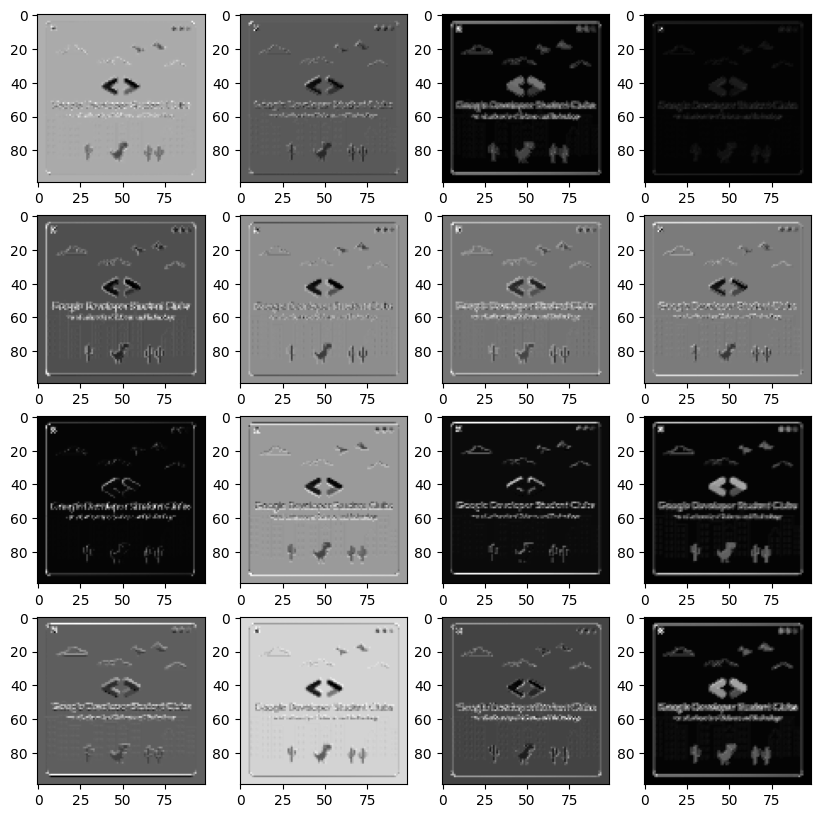

In [10]:
img_poolingsize = Maxpooling(img_gray_relu).operate()

fig2 = plt.figure(figsize= (10,10))
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.imshow(img_poolingsize[:,:,i], cmap= 'gray')
plt.show()